<a href="https://colab.research.google.com/github/chriscc447/orie3120_final/blob/main/number_of_streams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df.head()

,rank,date,artist,title,streams,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,duration_ms,time_signature
0,1,2017-01-01,Migos,Bad and Boujee (feat. Lil Uzi Vert),1371493,0.927,0.665,11.0,-5.313,1.0,0.2440,0.061,0.000000,0.123,0.175,127.076,spotify:track:4Km5HrUvYTaSUfiSGPJeQR,343150.0,4.0
1,2,2017-01-01,Drake,Fake Love,1180074,0.928,0.481,9.0,-9.350,0.0,0.2870,0.105,0.000000,0.176,0.613,134.007,spotify:track:343YBumqHu19cGoGARUTsd,210937.0,4.0
2,3,2017-01-01,The Weeknd,Starboy,1064351,0.679,0.587,7.0,-7.015,1.0,0.2760,0.141,0.000006,0.137,0.486,186.003,spotify:track:7MXVkk9YMctZqd1Srtv4MB,230453.0,4.0
3,4,2017-01-01,The Chainsmokers,Closer,1010492,0.748,0.524,8.0,-5.599,1.0,0.0338,0.414,0.000000,0.111,0.661,95.010,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,244960.0,4.0
4,5,2017-01-01,Rae Sremmurd,Black Beatles,874289,0.794,0.632,0.0,-6.163,1.0,0.0649,0.142,0.000000,0.128,0.355,145.926,spotify:track:6fujklziTHa8uoM5OQSfIo,291893.0,4.0


Text(0, 0.5, 'Count')

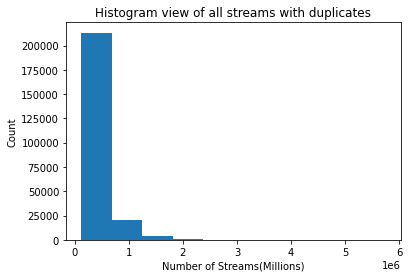

In [4]:
#An inital Histogram view of all streams with duplicates
plt.hist(df['streams'])
plt.title('Histogram view of all streams with duplicates')
plt.xlabel('Number of Streams(Millions)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

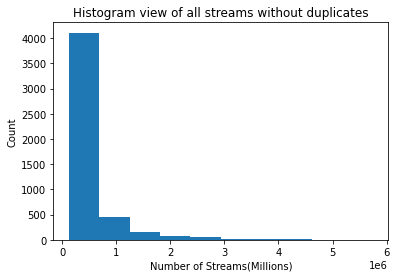

In [5]:
#Same histogram without duplicates
df_col = ['artist','title','streams','uri']
df_no_reps= df[df_col].copy().drop_duplicates(subset = 'uri')
len(df_no_reps)
plt.hist(df_no_reps['streams'])
plt.title('Histogram view of all streams without duplicates')
plt.xlabel('Number of Streams(Millions)')
plt.ylabel('Count')

In [6]:
df_no_reps.sort_values(['streams']).head(5)

,artist,title,streams,uri
399,Bruno Mars,Versace on the Floor,122488,spotify:track:0kN8xEmgMW9mh7UmDYHlJP
398,Isaiah,It's Gotta Be You,123189,spotify:track:6cAKeFFYW2aClZSUyvqAEW
397,The Weeknd,Ordinary Life,123961,spotify:track:15k2nBQJ0teDmPZHrOXL2N
1599,Joey Bada$$,DEVASTATED,125530,spotify:track:4ntsD33Pgsgk8rUyZLLiUV
395,Rae Sremmurd,Look Alive,125802,spotify:track:2IGr3q6ljcpLvHDFLtI0yW


In [7]:
#does this take artists max?
max_df= df.groupby('uri')['streams'].max().reset_index()
uris_hold = df[['artist','title','uri']].copy().drop_duplicates(subset = 'uri').reset_index()
max_df= max_df.merge(uris_hold, how="left", on = 'uri')
max_df.head()


,uri,streams,index,artist,title
0,spotify:track:000xQL6tZNLJzIrtIgxqSl,492315,16452,ZAYN,Still Got Time (feat. PARTYNEXTDOOR)
1,spotify:track:003VDDA7J3Xb2ZFlNx7nIZ,609856,225814,Trippie Redd,YELL OH
2,spotify:track:003eoIwxETJujVWmNFMoZy,439463,105440,Alessia Cara,Growing Pains
3,spotify:track:00B7TZ0Xawar6NZ00JFomN,818650,91411,Cardi B,Best Life (feat. Chance The Rapper)
4,spotify:track:00BNT97AtJ5aB8SSsE5xGH,368137,157294,2 Chainz,Threat 2 Society


Text(0, 0.5, 'Count')

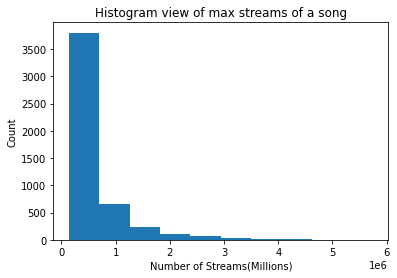

In [8]:
plt.hist(max_df['streams'])
plt.title('Histogram view of max streams of a song')
plt.xlabel('Number of Streams(Millions)')
plt.ylabel('Count')

In [9]:
#top 5 streams
max_df.sort_values(['streams']).tail(5)

,uri,streams,index,artist,title
3860,spotify:track:6DCZcSspjsKoFjzjrWoCdn,4739798,76184,Drake,God's Plan
1396,spotify:track:2G7V7zsVDxg1yRsu7Ew9RJ,4805299,108198,Drake,In My Feelings
3381,spotify:track:5Psnhdkyanjpgc2P8A5TSM,4842941,108186,Drake,Emotionless
1854,spotify:track:2yg9UN4eo5eMVJ7OB4RWj3,5219711,108185,Drake,Survival
287,spotify:track:0TlLq3lA83rQOYtrqBqSct,5749019,108184,Drake,Nonstop


In [10]:
#bot 5 streams
max_df.sort_values(['streams']).head(5)

,uri,streams,index,artist,title
277,spotify:track:0SuG9kyzGRpDqrCWtgD6Lq,133040,1399,Ed Sheeran,Give Me Love
4209,spotify:track:6j0teRL3WdExzqmy334sh5,133605,1396,Lil Uzi Vert,Seven Million (feat. Future)
1399,spotify:track:2GGOQWJo7FGEQojc7baekK,134420,1392,Ed Sheeran,Don't
3007,spotify:track:4qqArAiTPueDxIp7cf87h7,139227,599,MØ,Final Song
1748,spotify:track:2nBI3iWLhupR7LyAJ5GGkE,141632,2797,Kanye West,Champions


Text(0, 0.5, 'Count')

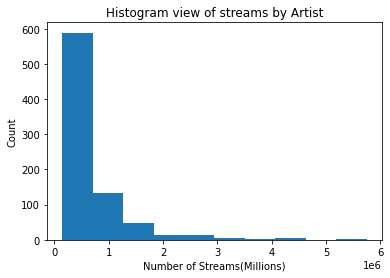

In [11]:
#Hist of Streams by Artist
Art_df= df.groupby('artist')['streams'].max().reset_index()
plt.title('Histogram view of streams by Artist')
plt.hist(Art_df['streams'])
plt.xlabel('Number of Streams(Millions)')
plt.ylabel('Count')

In [12]:
# Bot 5 streams by artists
Art_df.sort_values(['streams']).head(5)

,artist,streams
574,Phil Collins,143813
629,Sam Cooke,145484
49,August Alsina,149475
97,BobMcFerrin,151217
183,DeJ Loaf,152420


In [13]:
# Top 5 streams by artists
Art_df.sort_values(['streams']).tail(5)

,artist,streams
301,J. Cole,4233070
742,Travis Scott,4244308
776,XXXTENTACION,4437612
430,Lil Wayne,4444027
206,Drake,5749019
